# ADC Peaks of an specific channel

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import seaborn as sns

## Import all directories

In [124]:
# 1. Configuration Section 

CONFIG = { 
    "base_path": "/home/eic/Documents/internalinjection/internalinjection/data", 
    "amplitudes": [250, 500, 750, 1024], 
    "fpga_address": 208, 
    "runs": 5 
} 
 
# 2. Directory Generator Function 

def generate_all_dirs(config): 
    amplitude_dirs = {} 
    for amp in config["amplitudes"]: 
        amplitude_dirs[amp] = { 
            i: f'{config["base_path"]}/internalinjection_{config["fpga_address"]}_{amp}_{i+1}/raw_data' 
            for i in range(config["runs"]) 
        } 
    return amplitude_dirs 

# 3. Initialize All Directories 
all_dirs = generate_all_dirs(CONFIG) 

# 4. Utility Function to Get Specific Path 
def get_path(amplitude, run, dirs_dict=all_dirs): 
    try: 
        return dirs_dict[amplitude][run] 
    except KeyError: 
        raise ValueError(f"No path found for amplitude {amplitude} and run {run}") 

# 5. List All Paths 
def list_all_paths(dirs_dict=all_dirs): 
    return [path for amp_dirs in dirs_dict.values() for path in amp_dirs.values()] 

# Example: Print all paths 
for path in list_all_paths(): 
    print(path) 

/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_1/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_2/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_3/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_4/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_5/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_1/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_2/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_3/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_4/raw_data
/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_5/raw_data
/home/eic/Documents/

In [69]:
all_dirs

{250: {0: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_1/raw_data',
  1: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_2/raw_data',
  2: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_3/raw_data',
  3: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_4/raw_data',
  4: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_250_5/raw_data'},
 500: {0: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_1/raw_data',
  1: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_2/raw_data',
  2: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_3/raw_data',
  3: '/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_500_4/raw_data',
  4: '/home/eic/Documents/internali

## Extract the peak per amplitude

In [125]:
def extract_peaks(all_dirs, channel): 
    amplitudes_list = [] 
    peaks_list = [] 
    for amplitude, runs in all_dirs.items(): 
        for run_dir in runs.values(): 
            file_path = os.path.join(run_dir, f'ADC_Channel_{channel}.csv') 
            if os.path.exists(file_path): 
                df = pd.read_csv(file_path) 
                df.columns = df.columns.str.strip()
                
                if 'ADC Value' in df.columns: 
                    peak = df['ADC Value'].max() 
                    amplitudes_list.append(amplitude) 
                    peaks_list.append(peak) 
                else: 
                    print(f"'ADC Value' column missing in {file_path}") 
            else: 
                print(f"File not found: {file_path}") 
    return amplitudes_list, peaks_list 

### Print an specific channel

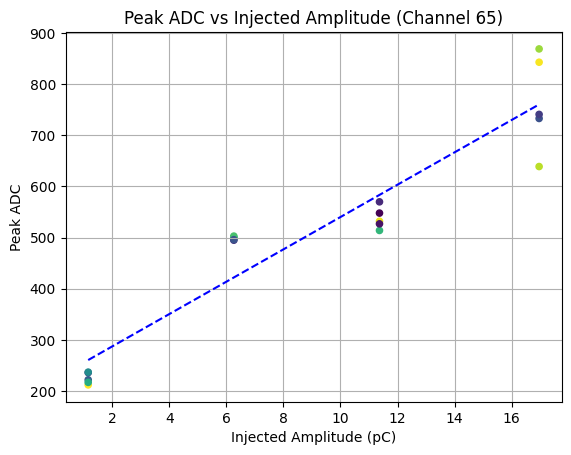

In [149]:
# Define the channel to plot 
channel = 65
amplitudes, peaks = extract_peaks(all_dirs, channel) 

# Converting amplitude to pC 
amplitudes_array = np.array(amplitudes) 
amplitudes_pC = (amplitudes_array - 193.03)/49 #pC 

# Linear regression 
slope, intercept, r_value, p_value, std_err = linregress(amplitudes_pC, peaks) 

# Plotting 
colors = np.random.rand(20)

plt.figure() 
plt.scatter(amplitudes_pC, peaks, s=20, c=colors) 
plt.xlabel('Injected Amplitude (pC)') 
plt.plot(amplitudes_pC, slope*amplitudes_pC + intercept, linestyle="--", color='blue', label=f'Linear Fit (R²={r_value**2:.4f})') 
plt.ylabel('Peak ADC') 
plt.title(f'Peak ADC vs Injected Amplitude (Channel {channel})') 
plt.grid(True) 
plt.show() 

## Print all peaks in channels and organize them in groups of 16

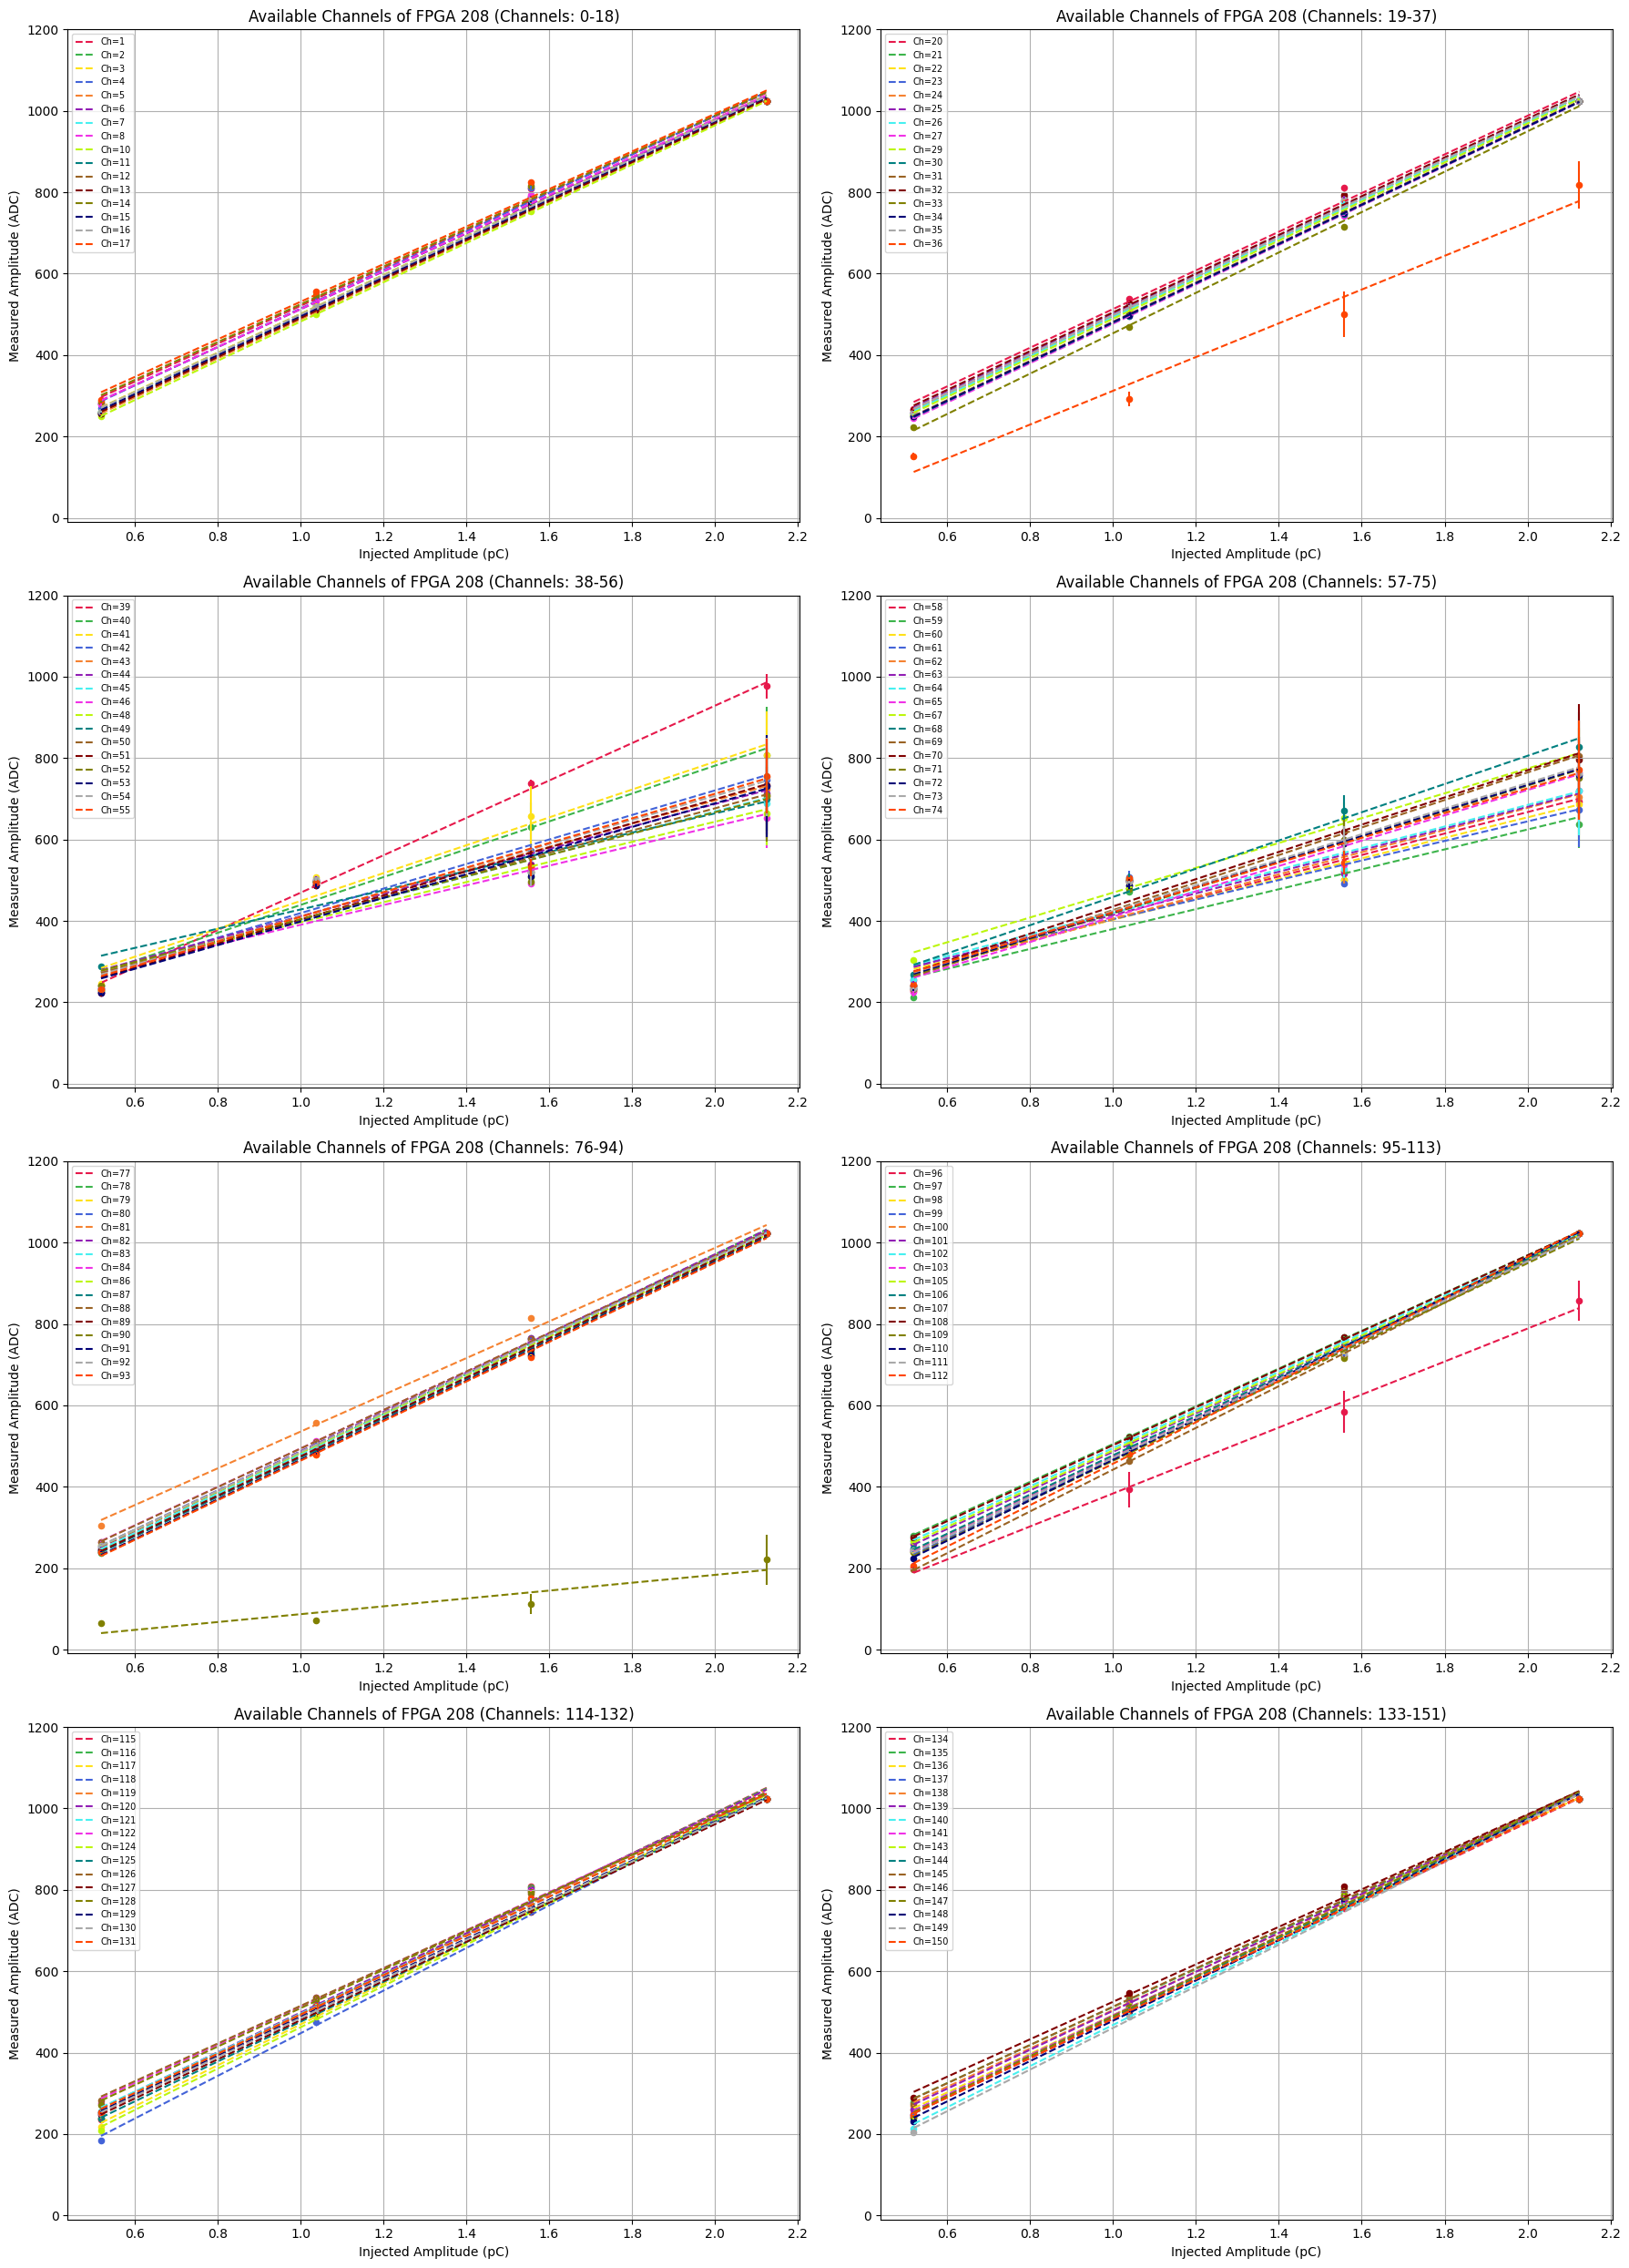

In [143]:
#sns.set_theme()
plt.style.use('default')
# Create a figure with 4x2 subplots 
fig, axs = plt.subplots(4, 2, figsize=(18, 25)) 
axs = axs.flatten() 

# Marker styles to cycle through 
markers = ['o', 's', 'D', '^', 'v', '>', '<', 'p', '*', 'h', 'X', '1', '2', '3', '4', '|'] 

line_colors = [
    "#e6194b",  # Red
    "#3cb44b",  # Green
    "#ffe119",  # Yellow
    "#4363d8",  # Blue
    "#f58231",  # Orange
    "#911eb4",  # Purple
    "#46f0f0",  # Cyan
    "#f032e6",  # Magenta
    "#bcf60c",  # Lime
    "#008080",  # Teal
    "#9a6324",  # Brown
    "#800000",  # Maroon
    "#808000",  # Olive
    "#000075",  # Navy
    "#a9a9a9",  # Dark Gray
    "#ff4500",  # Orange Red
    "#228b22",  # Forest Green
    "#1e90ff",  # Dodger Blue
    "#8b008b",  # Dark Magenta
]


# Define sets of channels to skip 
unused_channels = {0, 19, 37, 38, 57, 75, 76, 95, 114, 133, 151} # Not calibrated on the calibration process
periodicError_channels = {9, 18, 28, 47, 56, 66, 85, 94, 104, 113, 123, 132, 142} # Every 8 channels after an unused channel

# Total groups 
num_groups = 8 
files_per_group = 19 

colors = np.random.rand(19)

# Plot ideal behaviour
amp = np.linspace(1.325,17,100)
slope_ideal = 49
intercept_ideal = 193.03

# Loop over 8 groups 
for group_id in range(num_groups):
    j=1
    ax = axs[group_id]  # Select subplot 
    first_channel = group_id * files_per_group 
    last_channel = first_channel + files_per_group 
    marker_index = 0 
    j = 0

    for i in range(first_channel, last_channel): 
        if i in unused_channels or i in periodicError_channels: 
            #print(f"Skipping unused/calibration channel: {i}") 
            continue 

        amplitudes, peaks = extract_peaks(all_dirs, i) 

        # Converting amplitude to C 
        amplitudes_array = np.array(amplitudes) 
        amplitudes_pC = amplitudes_array*2.0752/1000

        # Linear regression 
        slope, intercept, r_value, p_value, std_err = linregress(amplitudes_pC, peaks) 

        # Compute the mean value in peaks per amplitude
        peaks_np = np.array(peaks)
        means = peaks_np.reshape(-1,5).mean(axis=1)
        std_dev = peaks_np.reshape(-1,5).std(axis=1)

        # Computing the mean square error
        #y_true = slope_ideal*amplitudes_pC + intercept_ideal
        #y_pred = slope*amplitudes_pC + intercept
        #mse = mean_squared_error(y_true, y_pred)
        
        ax.scatter(amplitudes_pC[4::5], means, s=20, c=line_colors[j % len(line_colors)], marker='o')
        ax.errorbar(amplitudes_pC[4::5], means, yerr=std_dev, fmt='', linestyle="None", c=line_colors[j % len(line_colors)])
        # R²={r_value**2:.1f}
        ax.plot(amplitudes_pC, slope*amplitudes_pC + intercept, linestyle="--", color=line_colors[j % len(line_colors)], label=f'Ch={i}') 

        j += 1
        marker_index += 1
        
    ax.set_title(f'Available Channels of FPGA 208 (Channels: {first_channel}-{last_channel - 1})') 
    ax.set_xlabel('Injected Amplitude (pC)') 
    ax.set_ylabel('Measured Amplitude (ADC)') 
    #ax.plot(amp, slope_ideal*amp + intercept_ideal, linestyle="-", color='black', label='Ideal Linearity')
    ax.set_ylim(-10, 1200) 
    ax.grid(True) 
    ax.legend(fontsize='x-small', markerscale=0.9) 

# Adjust layout 
plt.tight_layout() 
plt.show()
fig.savefig('linearity_FPGA_208.png')

## Individual channel

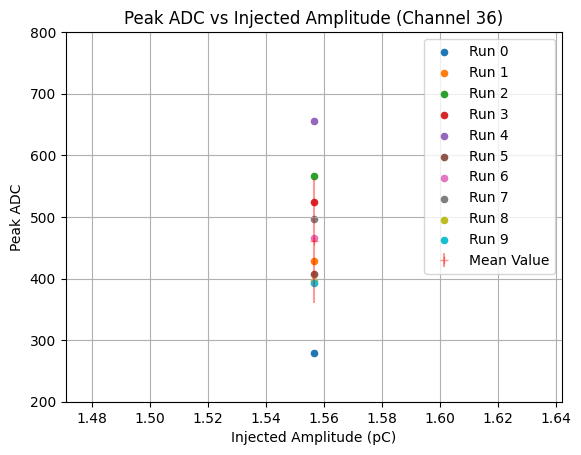

In [146]:
# Define the channel to plot 
channel = 36
dirs = {750: {0: "/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_1/raw_data/",
        1:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_2/raw_data/",
        2:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_3/raw_data/",
        3:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_4/raw_data/",
        4:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_5/raw_data/",
        5:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_6/raw_data/",
        6:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_7/raw_data/",
        7:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_8/raw_data/",
        8:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_9/raw_data/",
        9:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_36_10/raw_data/"}}

amplitudes, peaks = extract_peaks(dirs, channel) 

# Converting amplitude to pC 
amplitudes_array = np.array(amplitudes) 
amplitudes_pC = amplitudes_array*2.0752/1000 

# Standard deviation
peaks_np = np.array(peaks)
mean = peaks_np.mean()
std_dev = peaks_np.std()

# Plotting 
colors = np.random.rand(10)

fig=plt.figure() 
plt.errorbar(750*2.0752/1000 , mean, yerr=std_dev, fmt='+', color='red', linestyle="None", alpha=0.4, label='Mean Value')
for i in range(10):
    plt.scatter(750*2.0752/1000 , peaks_np[i], s=20, label=f'Run {i}')
plt.xlabel('Injected Amplitude (pC)') 
plt.ylim(200, 800)
plt.ylabel('Peak ADC') 
plt.legend()
plt.title(f'Peak ADC vs Injected Amplitude (Channel {channel})') 
plt.grid(True) 
plt.show() 
fig.savefig('ADCpeak_vs_amplitude_channel36.png')

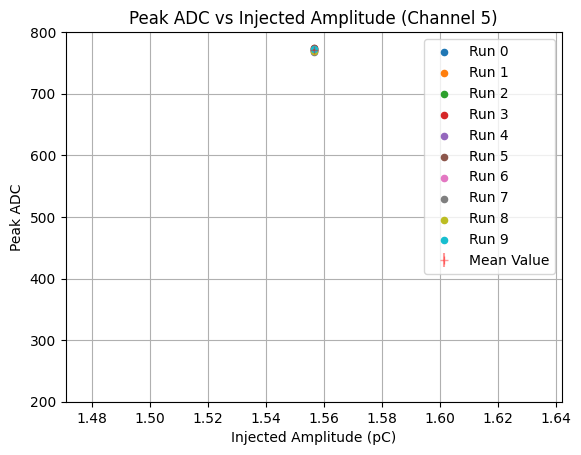

In [148]:
# Define the channel to plot 
channel = 5
dirs = {750: {0: "/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_1/raw_data/",
        1:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_2/raw_data/",
        2:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_3/raw_data/",
        3:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_4/raw_data/",
        4:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_5/raw_data/",
        5:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_6/raw_data/",
        6:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_7/raw_data/",
        7:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_8/raw_data/",
        8:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_9/raw_data/",
        9:"/home/eic/Documents/internalinjection/internalinjection/data/internalinjection_208_750_5_10/raw_data/"}}

amplitudes, peaks = extract_peaks(dirs, channel) 

# Converting amplitude to pC 
amplitudes_array = np.array(amplitudes) 
amplitudes_pC = amplitudes_array*2.0752/1000 

# Standard deviation
peaks_np = np.array(peaks)
mean = peaks_np.mean()
std_dev = peaks_np.std()

# Plotting 
colors = np.random.rand(10)

fig=plt.figure() 
plt.errorbar(750*2.0752/1000 , mean, yerr=std_dev, fmt='+', color='red', linestyle="None", alpha=0.4, label='Mean Value')
for i in range(10):
    plt.scatter(750*2.0752/1000 , peaks_np[i], s=20, label=f'Run {i}')
plt.xlabel('Injected Amplitude (pC)') 
plt.ylabel('Peak ADC') 
plt.ylim(200, 800)
plt.legend()
plt.title(f'Peak ADC vs Injected Amplitude (Channel {channel})') 
plt.grid(True) 
plt.show() 
fig.savefig('ADCpeak_vs_amplitude_channel5.png')

In [89]:
std_dev

np.float64(100.23916400289859)

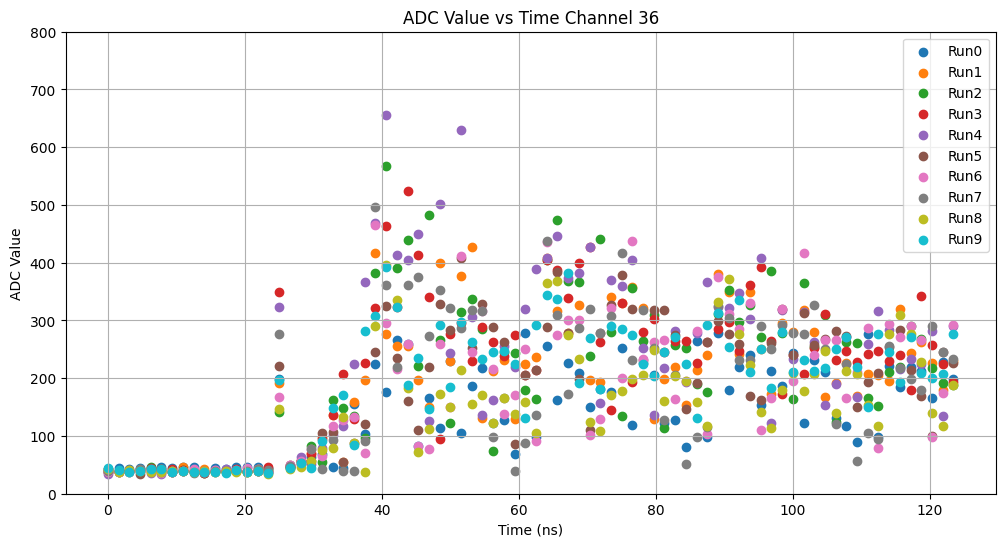

In [139]:
fig = plt.figure(figsize=(12,6))

for i in range(10):
    filename = 'ADC_Channel_36.csv'
    filepath = dirs[750][i]+filename

    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    plt.scatter(df['Time'], df['ADC Value'], label=f'Run{i}')

plt.title('ADC Value vs Time Channel 36')
plt.xlabel('Time (ns)')
plt.ylim(0,800)
plt.ylabel('ADC Value')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('ADC_vs_Time_channel36.png')

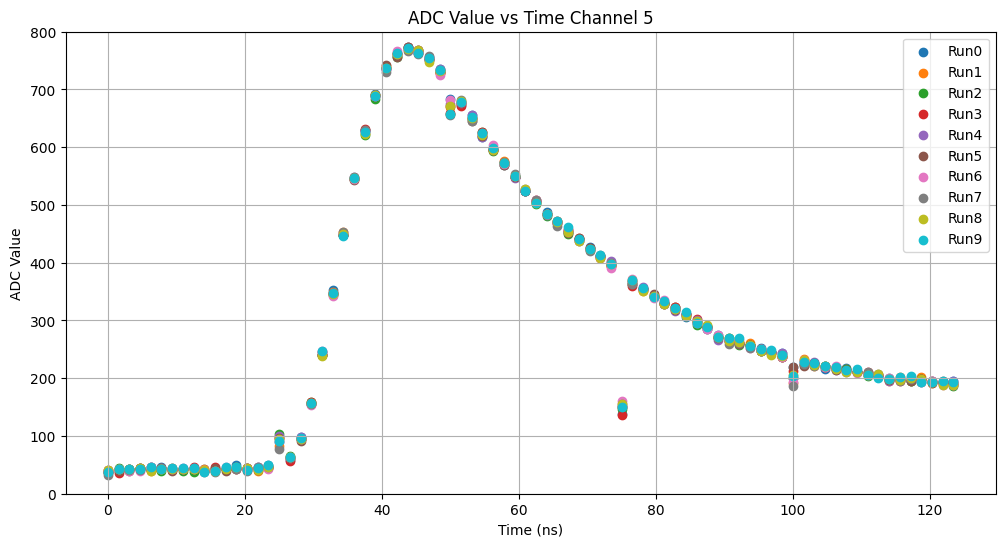

In [142]:
fig = plt.figure(figsize=(12,6))

for i in range(10):
    filename = 'ADC_Channel_5.csv'
    filepath = dirs[750][i]+filename

    df = pd.read_csv(filepath)
    df.columns = df.columns.str.strip()
    plt.scatter(df['Time'], df['ADC Value'], label=f'Run{i}')

plt.title('ADC Value vs Time Channel 5')
plt.xlabel('Time (ns)')
plt.ylim(0,800)
plt.ylabel('ADC Value')
plt.legend()
plt.grid(True)
plt.show()
fig.savefig('ADC_vs_Time_channel5.png')